# Code gi·∫£i thu·∫≠t decision tree


Accuracy: 1.0


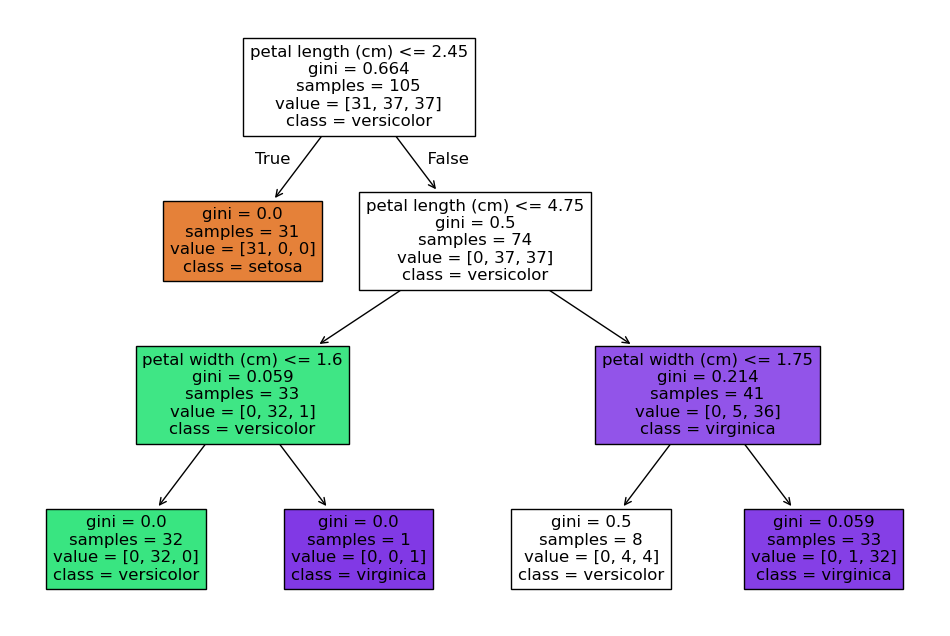

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True) # Load data m·∫´u

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Chia train test

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42) # T·∫°o m√¥ h√¨nh c√¢y

model.fit(X_train, y_train) # Training 

y_pred = model.predict(X_test) # D·ª± ƒëo√°n

print("Accuracy:", accuracy_score(y_test, y_pred)) # ƒê√°nh gi√°

# V·∫Ω c√¢y quy·∫øt ƒë·ªãnh
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()


# Tri·ªÉn khai Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#T·∫°o m√¥ h√¨nh RF
rf = RandomForestClassifier(
    n_estimators=100,    # S·ªë c√¢y 
    max_depth=None,      # ƒê·ªô s√¢u t·ªëi ƒëa
    random_state=42
)

#Training
rf.fit(X_train, y_train)

#Predict v√† ƒë√°nh gi√°
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


# ƒê√°nh gi√° t·∫ßm quan tr·ªçng c·ªßa RF

In [ ]:
import pandas as pd
import numpy as np

# L·∫•y ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng
importances = rf.feature_importances_
feature_names = load_iris().feature_names

# Show ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


# Hyperparameter Tuning

### S·ª≠ d·ª•ng GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9428571428571428


### S·ª≠ d·ª•ng RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)
print("Best params:", random_search.best_params_)


Best params: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 20}


# SVM Model

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Gaussian Naive Bayes Model

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

texts = ["T√¥i l√† Ti·∫øn Minh", "Gymbro c·ªßa Hu·ª≥nh Anh Nh·ª±t", "Anh em m√¨nh th·∫ø th√¥i", "h·ªçc b√° sgu"]
labels = [1, 0, 1, 0]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


# Th·ª±c h√†nh SVM model

### Import th∆∞ vi·ªán, load data, chia train/test

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# T·∫£i d·ªØ li·ªáu Iris t·ª´ sklearn
iris = datasets.load_iris()

# Xem m√¥ t·∫£ d·ªØ li·ªáu
print(iris.DESCR)

# T√°ch ƒë·∫∑c tr∆∞ng v√† nh√£n
data = iris.data
target = iris.target

# T√™n c√°c ƒë·∫∑c tr∆∞ng
print("T√™n c√°c ƒë·∫∑c tr∆∞ng:", iris.feature_names)
print("T√™n c√°c l·ªõp:", iris.target_names)

# Chia d·ªØ li·ªáu train/test theo t·ªâ l·ªá 80:20
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=101
)

print("K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán:", X_train.shape)
print("K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm tra:", X_test.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### T·∫°o m√¥ h√¨nh

ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh SVM: 96.67 %

B√°o c√°o ph√¢n lo·∫°i:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



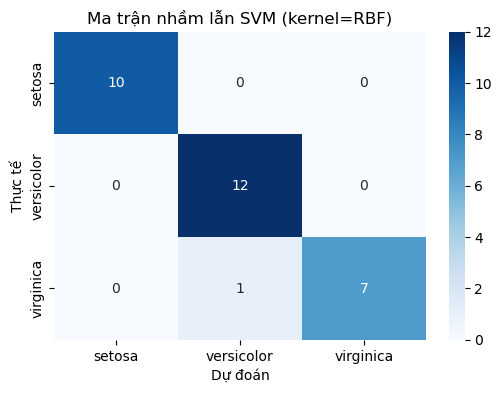

In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh ph√¢n l·ªõp SVM
clf = svm.SVC()  # m·∫∑c ƒë·ªãnh kernel='rbf', C=1.0, gamma='scale'

# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán
clf.fit(X_train, y_train)

# D·ª± ƒëo√°n nh√£n cho t·∫≠p ki·ªÉm tra
y_pred = clf.predict(X_test)

# --- ƒê√°nh gi√° m√¥ h√¨nh ---
# ƒê·ªô ch√≠nh x√°c
acc = accuracy_score(y_test, y_pred)
print("ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh SVM:", round(acc * 100, 2), "%")

# B√°o c√°o chi ti·∫øt precision, recall, f1-score
print("\nB√°o c√°o ph√¢n lo·∫°i:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Ma tr·∫≠n nh·∫ßm l·∫´n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('D·ª± ƒëo√°n')
plt.ylabel('Th·ª±c t·∫ø')
plt.title('Ma tr·∫≠n nh·∫ßm l·∫´n SVM (kernel=RBF)')
plt.show()


### ƒê√°nh gi√° ACC

In [7]:
# --- ƒê√°nh gi√° ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra ---
train_acc = clf.score(X_train, y_train)  # ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán
val_acc = clf.score(X_test, y_test)      # ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra

print("ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán (Training accuracy): {:.2f}%".format(train_acc * 100))
print("ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra (Validation accuracy): {:.2f}%".format(val_acc * 100))

ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán (Training accuracy): 95.00%
ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra (Validation accuracy): 96.67%


Find Kernel

In [ ]:
# Danh s√°ch c√°c lo·∫°i kernel c·∫ßn th·ª≠
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# C√°c bi·∫øn ƒë·ªÉ l∆∞u m√¥ h√¨nh t·ªët nh·∫•t, ƒë·ªô ch√≠nh x√°c cao nh·∫•t v√† kernel t∆∞∆°ng ·ª©ng
best_svm = None
best_val_acc = -1
best_kernel = None

# Hu·∫•n luy·ªán c√°c m√¥ h√¨nh v·ªõi t·ª´ng kernel
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, probability=True, random_state=101)
    clf.fit(X_train, y_train)
    
    # T√≠nh ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra
    tmp_val_acc = clf.score(X_test, y_test)
    
    print(f"Kernel = {kernel:8s} | Validation accuracy = {tmp_val_acc * 100:.2f}%")
    
    # N·∫øu m√¥ h√¨nh hi·ªán t·∫°i t·ªët h∆°n m√¥ h√¨nh tr∆∞·ªõc -> c·∫≠p nh·∫≠t m√¥ h√¨nh t·ªët nh·∫•t
    if tmp_val_acc > best_val_acc:
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernel

# Hi·ªÉn th·ªã k·∫øt qu·∫£ t·ªët nh·∫•t
print("\nüîπ Best validation accuracy: {:.2f}% with kernel: '{}'".format(best_val_acc * 100, best_kernel))


Kernel = linear   | Validation accuracy = 100.00%
Kernel = poly     | Validation accuracy = 100.00%
Kernel = rbf      | Validation accuracy = 96.67%
Kernel = sigmoid  | Validation accuracy = 26.67%

üîπ Best validation accuracy: 100.00% with kernel: 'linear'


### B√†i t·∫≠p th·ª±c h√†nh 2 SVM

## B√†i to√°n 2: X√¢y d·ª±ng m√¥ h√¨nh d·ª±a v√†o gi·∫£i thu·∫≠t SVM tr√™n d·ªØ li·ªáu h√¨nh ·∫£nh Handwritten-Digit-MNIST-
SVM. D·ªØ li·ªáu l·∫•y t·ª´ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

### Import th∆∞ vi·ªán v√† t·∫£i d·ªØ li·ªáu l√† t·∫≠p c√°c h√¨nh ·∫£nh vi·∫øt tay t·ª´ s·ªë 0 ƒë·∫øn s·ªë 9

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# T·∫£i d·ªØ li·ªáu ch·ªØ s·ªë vi·∫øt tay (0‚Äì9)
digits = load_digits(n_class=10)

# Ki·ªÉm tra th√¥ng tin d·ªØ li·ªáu
print("K√≠ch th∆∞·ªõc t·∫≠p d·ªØ li·ªáu:", digits.data.shape)
print("K√≠ch th∆∞·ªõc ·∫£nh m·ªói m·∫´u:", digits.images[0].shape)
print("S·ªë l∆∞·ª£ng nh√£n:", len(np.unique(digits.target)))
print("C√°c nh√£n c√≥ trong t·∫≠p d·ªØ li·ªáu:", np.unique(digits.target))


K√≠ch th∆∞·ªõc t·∫≠p d·ªØ li·ªáu: (1797, 64)
K√≠ch th∆∞·ªõc ·∫£nh m·ªói m·∫´u: (8, 8)
S·ªë l∆∞·ª£ng nh√£n: 10
C√°c nh√£n c√≥ trong t·∫≠p d·ªØ li·ªáu: [0 1 2 3 4 5 6 7 8 9]


### Kh·∫£o s√°t th√¥ng tin

In [10]:
# T·∫£i d·ªØ li·ªáu
digits = load_digits(n_class=10)

# Xem to√†n b·ªô th√¥ng tin c·ªßa ƒë·ªëi t∆∞·ª£ng 'digits'
print("=== Th√¥ng tin t·ªïng quan v·ªÅ ƒë·ªëi t∆∞·ª£ng digits ===")
print(digits)

# Xem d·ªØ li·ªáu c·ªßa m·ªôt h√¨nh d∆∞·ªõi d·∫°ng ma tr·∫≠n 8x8
print("\n=== ·∫¢nh ƒë·∫ßu ti√™n d∆∞·ªõi d·∫°ng ma tr·∫≠n 8x8 ===")
print(digits['data'][0].reshape(8, 8))

# Xem d·ªØ li·ªáu c·ªßa m·ªôt h√¨nh d∆∞·ªõi d·∫°ng m·∫£ng (flatten 1D g·ªìm 64 ph·∫ßn t·ª≠)
print("\n=== ·∫¢nh ƒë·∫ßu ti√™n d∆∞·ªõi d·∫°ng m·∫£ng (1D) ===")
print(digits['data'][0])

# Xem 9 nh√£n ƒë·∫ßu ti√™n trong t·∫≠p d·ªØ li·ªáu
print("\n=== 9 nh√£n ƒë·∫ßu ti√™n trong t·∫≠p d·ªØ li·ªáu ===")
print(digits['target'][0:9])

=== Th√¥ng tin t·ªïng quan v·ªÅ ƒë·ªëi t∆∞·ª£ng digits ===
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_

### V·∫Ω h√¨nh 

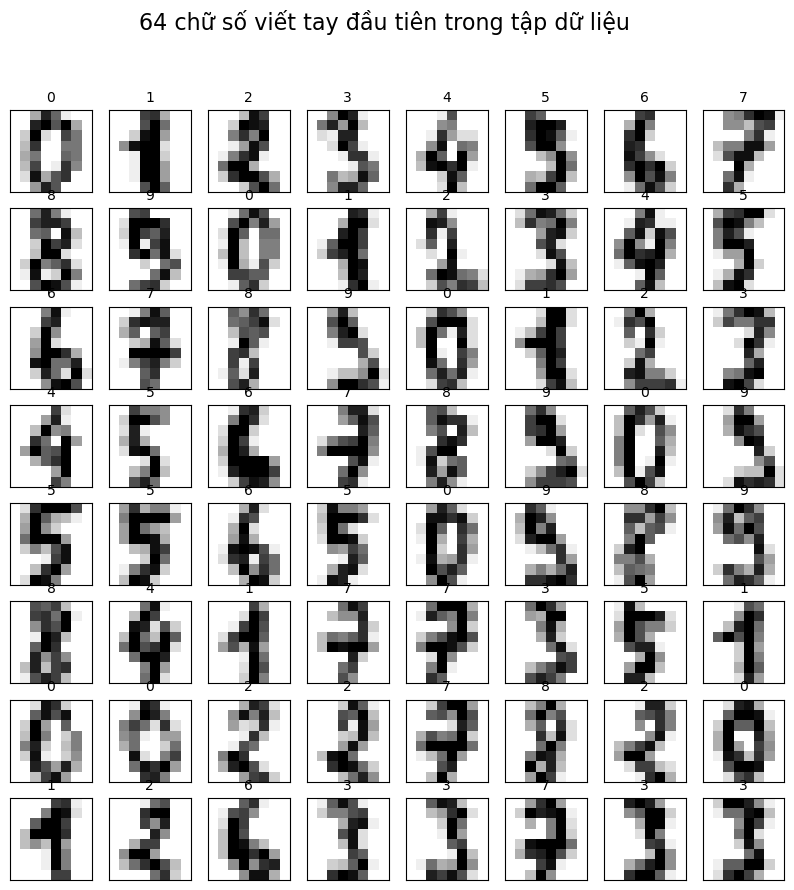

In [11]:
fig, ax = plt.subplots(8, 8, figsize=(10, 10))  # T·∫°o l∆∞·ªõi 8x8 √¥
for i, axi in enumerate(ax.flat):               # Duy·ªát qua t·ª´ng √¥
    axi.imshow(digits.images[i], cmap='binary') # Hi·ªÉn th·ªã ·∫£nh ·ªü d·∫°ng thang x√°m
    axi.set(xticks=[], yticks=[])               # ·∫®n tr·ª•c x, y
    axi.set_title(f"{digits.target[i]}", fontsize=10)  # Ghi nh√£n th·∫≠t c·ªßa ·∫£nh
plt.suptitle("64 ch·ªØ s·ªë vi·∫øt tay ƒë·∫ßu ti√™n trong t·∫≠p d·ªØ li·ªáu", fontsize=16)
plt.show()

### V·∫Ω h√¨nh t·ª´ ma tr·∫≠n 8x8

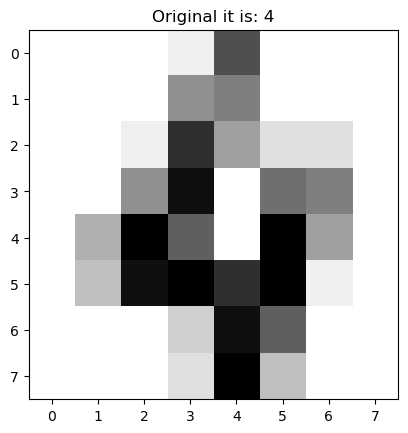

In [13]:
def view_digit(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    plt.title('Original it is: ' + str(digits.target[index]))
    plt.show()

view_digit(4)

## Nhi·ªám v·ª• 2: X√¢y d·ª±ng m√¥ h√¨nh SVM ƒë·ªÉ nh·∫≠n di·ªán ch·ªØ vi·∫øt tay t·ª´ 0 ‚Äì 9

### Chu·∫©n b·ªã data

üéØ ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh SVM: 0.9527027027027027

üìä B√°o c√°o ph√¢n lo·∫°i:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        30
           2       1.00      1.00      1.00        27
           3       1.00      0.80      0.89        30
           4       0.97      0.91      0.94        33
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.84      0.93      0.88        28
           9       0.91      0.94      0.92        31

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296

üß© Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[26  0  0  0  1  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  

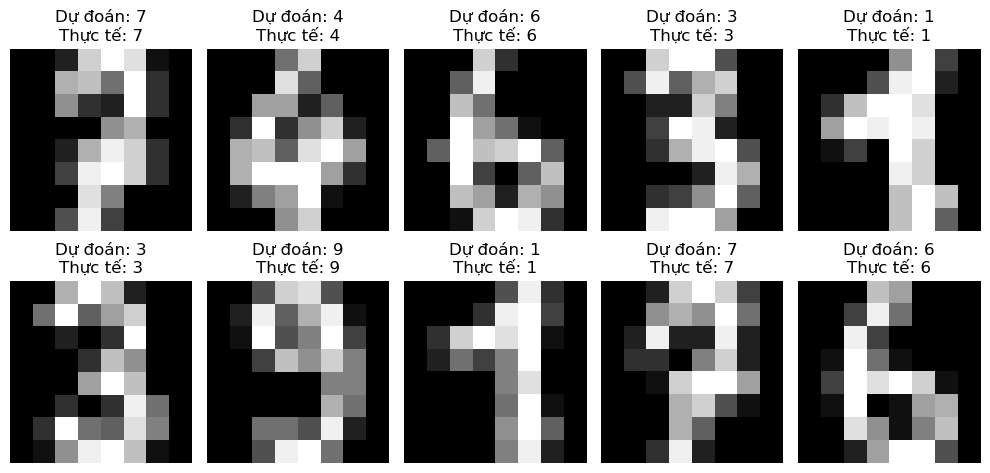

In [14]:
digits = load_digits(n_class=10)

# 3. Chu·∫©n b·ªã d·ªØ li·ªáu
main_data = digits['data']     # D·ªØ li·ªáu ·∫£nh (64 gi√° tr·ªã x√°m)
targets = digits['target']     # Nh√£n t∆∞∆°ng ·ª©ng (0‚Äì9)

# 4. Kh·ªüi t·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh SVM
svc = svm.SVC(gamma=0.001, C=100)
svc.fit(main_data[:1500], targets[:1500])   # Hu·∫•n luy·ªán tr√™n 1500 m·∫´u ƒë·∫ßu

# 5. D·ª± ƒëo√°n nh√£n cho c√°c m·∫´u c√≤n l·∫°i
predictions = svc.predict(main_data[1501:])

# 6. ƒê√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh
acc = accuracy_score(targets[1501:], predictions)
print("üéØ ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh SVM:", acc)
print("\nüìä B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(targets[1501:], predictions))

# 7. Ma tr·∫≠n nh·∫ßm l·∫´n
print("üß© Ma tr·∫≠n nh·∫ßm l·∫´n:\n", confusion_matrix(targets[1501:], predictions))

# 8. Hi·ªÉn th·ªã m·ªôt v√†i ·∫£nh d·ª± ƒëo√°n v√† nh√£n th·ª±c t·∫ø
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[1501 + i], cmap='gray')
    ax.set_title(f"D·ª± ƒëo√°n: {predictions[i]}\nTh·ª±c t·∫ø: {targets[1501 + i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### ƒê√°nh gi√° hi·ªáu qu·∫£

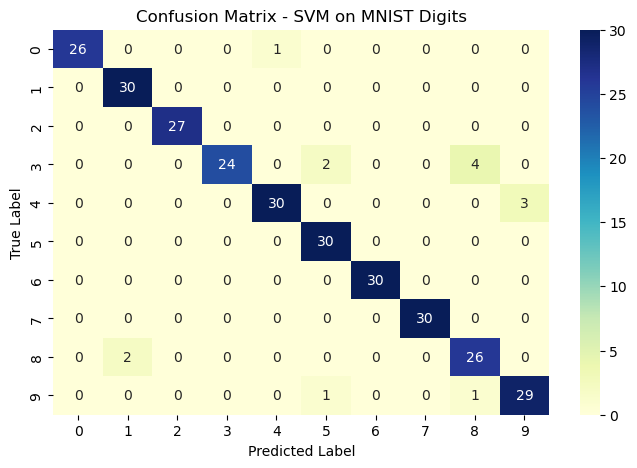

In [15]:
cm = confusion_matrix(targets[1501:], predictions)

# T·∫°o DataFrame ƒë·ªÉ v·∫Ω heatmap
conf_matrix = pd.DataFrame(data=cm)

# V·∫Ω heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - SVM on MNIST Digits")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### IN d·∫°ng vƒÉn b·∫£n

In [16]:
print(classification_report(targets[1501:], predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        30
           2       1.00      1.00      1.00        27
           3       1.00      0.80      0.89        30
           4       0.97      0.91      0.94        33
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.84      0.93      0.88        28
           9       0.91      0.94      0.92        31

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296

